## Project Euler - Problem 107 "Minimal network"

The following problem is from the [Project Euler](https://projecteuler.net/problem=107) website, which grants permission for its content to be freely shared elsewere under a Creative Commons Licence (CC BY-NC-SA 4.0).

The following undirected network consists of seven vertices and twelve edges with a total weight of 243.

![example G](p107_1.png)

The same network can be represented by the matrix below.

<table cellpadding="5" cellspacing="0" border="1" align="center"><tr><td>    </td><td><b>A</b></td><td><b>B</b></td><td><b>C</b></td><td><b>D</b></td><td><b>E</b></td><td><b>F</b></td><td><b>G</b></td>
</tr><tr><td><b>A</b></td><td>-</td><td>16</td><td>12</td><td>21</td><td>-</td><td>-</td><td>-</td>
</tr><tr><td><b>B</b></td><td>16</td><td>-</td><td>-</td><td>17</td><td>20</td><td>-</td><td>-</td>
</tr><tr><td><b>C</b></td><td>12</td><td>-</td><td>-</td><td>28</td><td>-</td><td>31</td><td>-</td>
</tr><tr><td><b>D</b></td><td>21</td><td>17</td><td>28</td><td>-</td><td>18</td><td>19</td><td>23</td>
</tr><tr><td><b>E</b></td><td>-</td><td>20</td><td>-</td><td>18</td><td>-</td><td>-</td><td>11</td>
</tr><tr><td><b>F</b></td><td>-</td><td>-</td><td>31</td><td>19</td><td>-</td><td>-</td><td>27</td>
</tr><tr><td><b>G</b></td><td>-</td><td>-</td><td>-</td><td>23</td><td>11</td><td>27</td><td>-</td>
</tr></table>

However, it is possible to optimise the network by removing some edges and still ensure that all points on the network remain connected. The network which achieves the maximum saving is shown below. It has a weight of 93, representing a saving of 243 − 93 = 150 from the original network.

![example MST](p107_2.png)

Using network.txt, a 6K text file containing a network with forty vertices, and given in matrix form, find the maximum saving which can be achieved by removing redundant edges whilst ensuring that the network remains connected.

## Python solution

In [1]:
# Using: Python 3.7.6, NumPy 1.18.1, Matplotlib 3.1.3, NetworkX 2.4
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
# import weight matrix and set non-edges to have weights of 0
G_weight_matrix = np.nan_to_num(np.genfromtxt('p107_network.txt', delimiter=','))

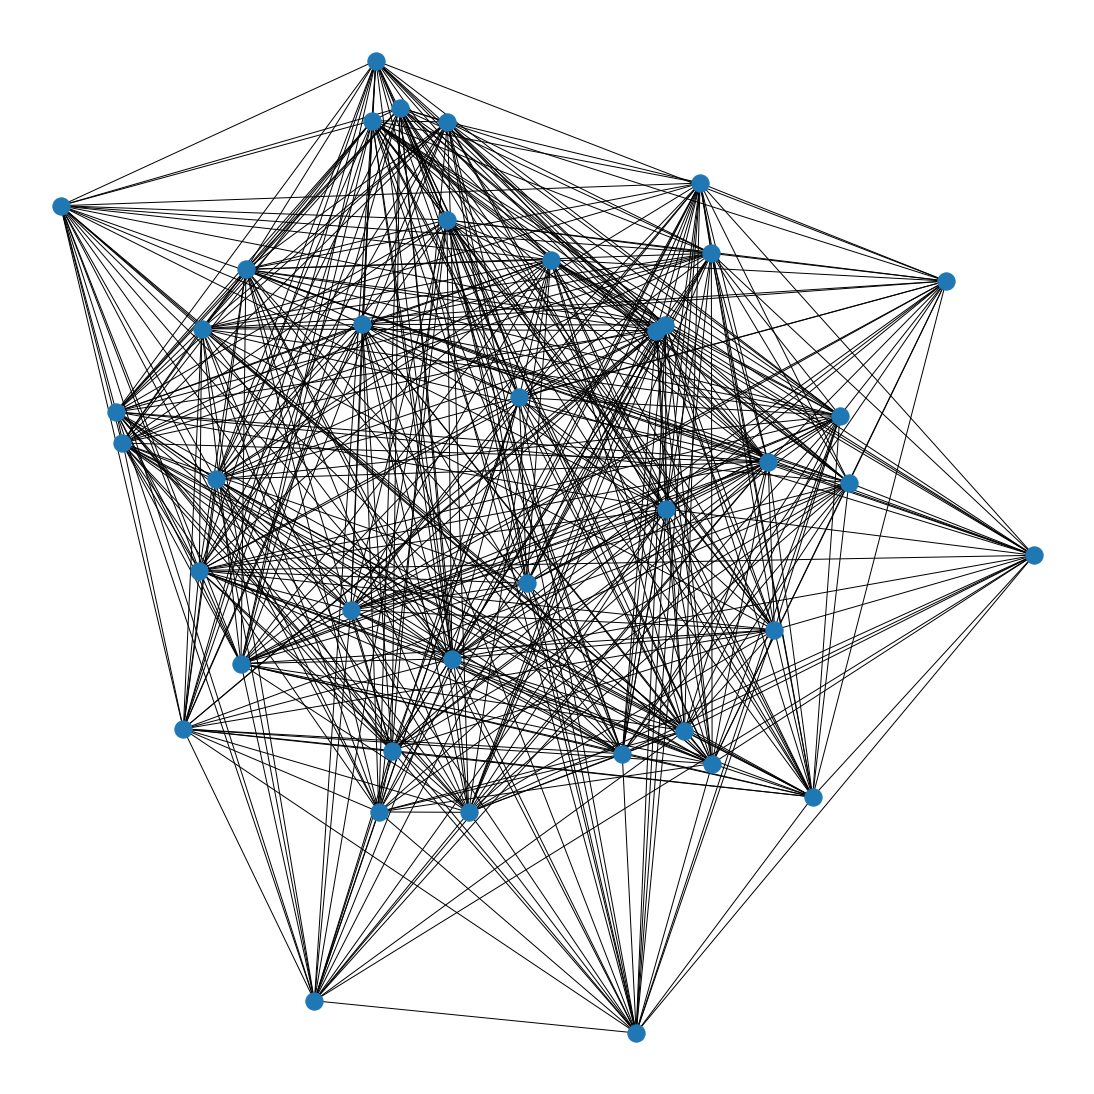

In [3]:
# create a networkx graph object using the weight matrix
G = nx.from_numpy_matrix(G_weight_matrix)
nx.draw(G)

In [4]:
print("The # of edges is", str(G.number_of_edges()))
print("The # of nodes is", str(G.number_of_nodes()))

The # of edges is 513
The # of nodes is 40


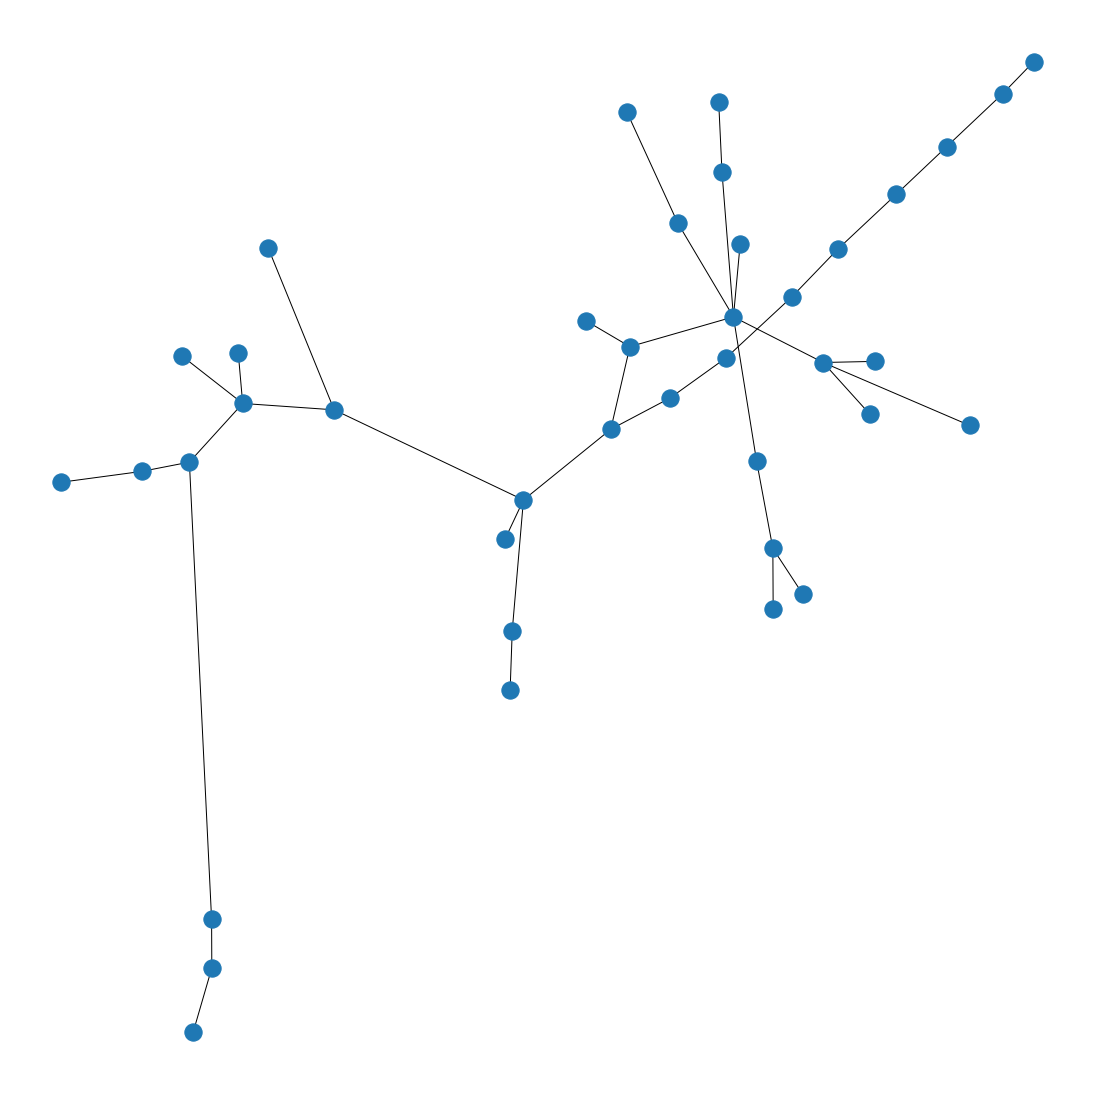

In [5]:
# use Kruskal's algorithm to find the minimum spanning tree (MST)
MST = nx.minimum_spanning_tree(G)
MST_weight_matrix = nx.to_numpy_matrix(MST)
nx.draw(MST)

In [6]:
# calculate the "saving" (defined in problem)
# to do this we calculate the "cost" (total sum of weights) of G and the MST
# saving = cost(G) - cost(MST)
# to calculate the "cost" we can sum the weight matrices (and divide by 2 since it is symmetric)
print("The sum of weights is", str(np.sum(MST_weight_matrix)/2))
print("The sum of weights for the MST is", str(np.sum(G_weight_matrix)/2))
saving = np.sum(G_weight_matrix)/2 - np.sum(MST_weight_matrix)/2
print("The saving is", saving)

The sum of weights is 2153.0
The sum of weights for the MST is 261832.0
The saving is 259679.0
